# Superstore
Data superstore, dari data ini akan dilakukan pengelompokkan pelanggan berdasarkan data transaksi pelanggan ketika berbelanja di superstore.

Tujuan dari analisis ini adalah untuk meningkatkan penjualan dan keuntungan,membuat strategi bisnis yang tepat, dan meningkatkan loyalitas pelanggan.

Data ini diperoleh dari kaggle dengan judul [Superstore dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final).

Sebelum memulai tahapan analisis, langkah pertama adalah mengimpor dataset seperti di bawah ini:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import string
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/PEMODELAN STATISTIKA/'
df = pd.read_csv(os.path.join(path, 'Sample - Superstore.csv'), encoding='latin1')

In [ ]:
path = '/content/drive/MyDrive/PEMODELAN STATISTIKA/Sample - Superstore.csv'
df = pd.read_csv(os.path.join(path), encoding='latin1')

# Pre-processing Data

Berikut merupakan tahap pre-processing data pada dataset Superstore. Proses pre-processing meliputi penelahaan data, validasi data, pemilihan atribut yang relevan, pembersihan data, serta normalisasi atau konstruksi data.

## Tahap 1 : Penelaahan Data

Pada tahap ini, data akan ditelaah berdasarkan beberapa aspek penting, yaitu:

### Atribut dan record data

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Dataset ini memiliki 20 variabel dengan 9994 record data dengan tipe data yang berisi objek, integer, dan float.

Dapat dilihat bahwa data tanggal pelanggan melakukan pemesanan bertipe objek, data ini penting untuk mengetahui resensi atau kapan pelanggan melakukan pemesanan terakhir. Maka, perlu dilakukan pre-processing data pada tanggal pesan.

### Missing Value

Selanjutnya, akan dilakukan pengecekan apakah terdapat missing data pada dataset atau tidak.

In [ ]:
missing_data = df.isnull().sum()
print("Jumlah Missing Data di setiap kolom:")
print(missing_data)

Jumlah Missing Data di setiap kolom:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### Duplicate data

Selanjutnya, akan dilakukan pengecekan apakah ada data duplikat atau tidak

In [ ]:
duplicate_data = df.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicate_data}")

Jumlah Data Duplikat: 0


### Data unik

In [ ]:
data_object = df[[ 'Ship Mode', 'Customer ID', 'Order ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]
for feature in data_object:
    print(feature,':',data_object[feature].nunique())

Ship Mode : 4
Customer ID : 793
Order ID : 5009
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


### Statistika Deskriptif

In [ ]:
def describe_with_format(df):
  return df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

print(describe_with_format(df[['Sales', 'Quantity', 'Discount', 'Profit']]))

          Sales Quantity Discount    Profit
count   9994.00  9994.00  9994.00   9994.00
mean     229.86     3.79     0.16     28.66
std      623.25     2.23     0.21    234.26
min        0.44     1.00     0.00  -6599.98
25%       17.28     2.00     0.00      1.73
50%       54.49     3.00     0.20      8.67
75%      209.94     5.00     0.20     29.36
max    22638.48    14.00     0.80   8399.98


In [ ]:
df.describe(include='object')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [ ]:
# Menampilkan data dengan nilai Sales paling besar
df_sorted_sales = df.sort_values('Sales', ascending=False)
df_sorted_sales.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784


In [ ]:
# Menampilkan data dengan nilai Sales paling besar
df_sorted_sales = df.sort_values('Profit', ascending=False)
df_sorted_sales.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.976


In [ ]:
# prompt: melihat tanggal paling lama pada order date

# Convert 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Find the oldest order date
oldest_order_date = df['Order Date'].min()

print(f"The oldest order date is: {oldest_order_date}")

The oldest order date is: 2014-01-03 00:00:00


In [ ]:
# prompt: melihat tanggal paling baru pada order date

# Convert 'Order Date' to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Find the oldest order date
last_order_date = df['Order Date'].max()

print(f"The oldest order date is: {last_order_date}")

The oldest order date is: 2017-12-30 00:00:00


### Visualisasi Data

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Standard Class'),
  Text(1, 0, 'Second Class'),
  Text(2, 0, 'First Class'),
  Text(3, 0, 'Same Day')])

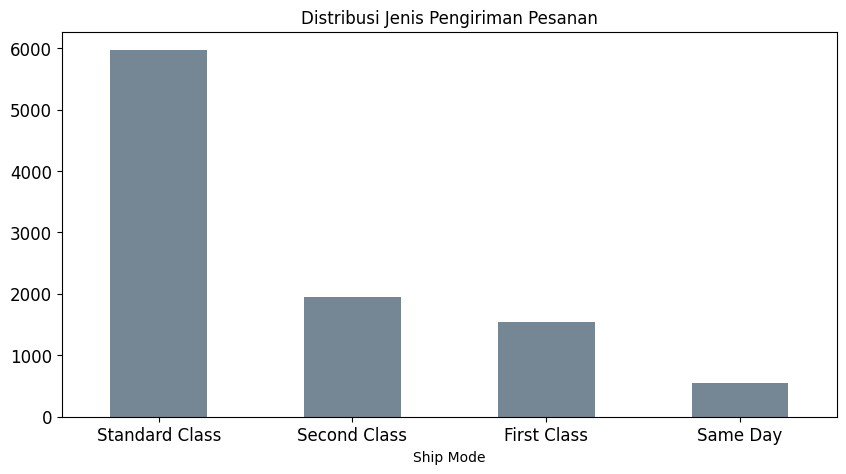

In [ ]:
plt.figure(figsize=(10, 5))
df['Ship Mode'].value_counts().plot(kind='bar', color=['#758694'], fontsize=12)
plt.title("Distribusi Jenis Pengiriman Pesanan",fontsize=12)
plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Consumer'), Text(1, 0, 'Corporate'), Text(2, 0, 'Home Office')])

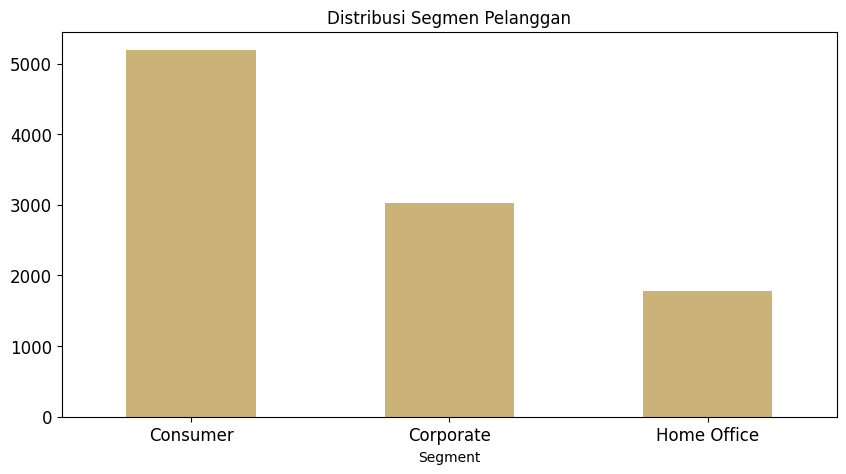

In [ ]:
plt.figure(figsize=(10, 5))
df['Segment'].value_counts().plot(kind='bar', color=['#CBB279'], fontsize=12)
plt.title("Distribusi Segmen Pelanggan",fontsize=12)
plt.xticks(rotation=0)

<Axes: xlabel='Category'>

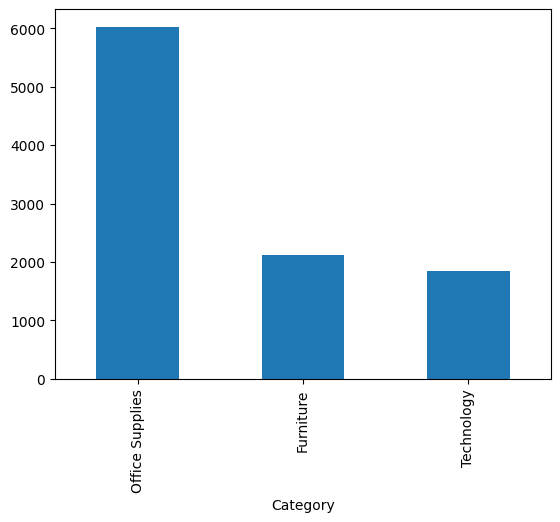

In [ ]:
df['Category'].value_counts().plot(kind='bar')

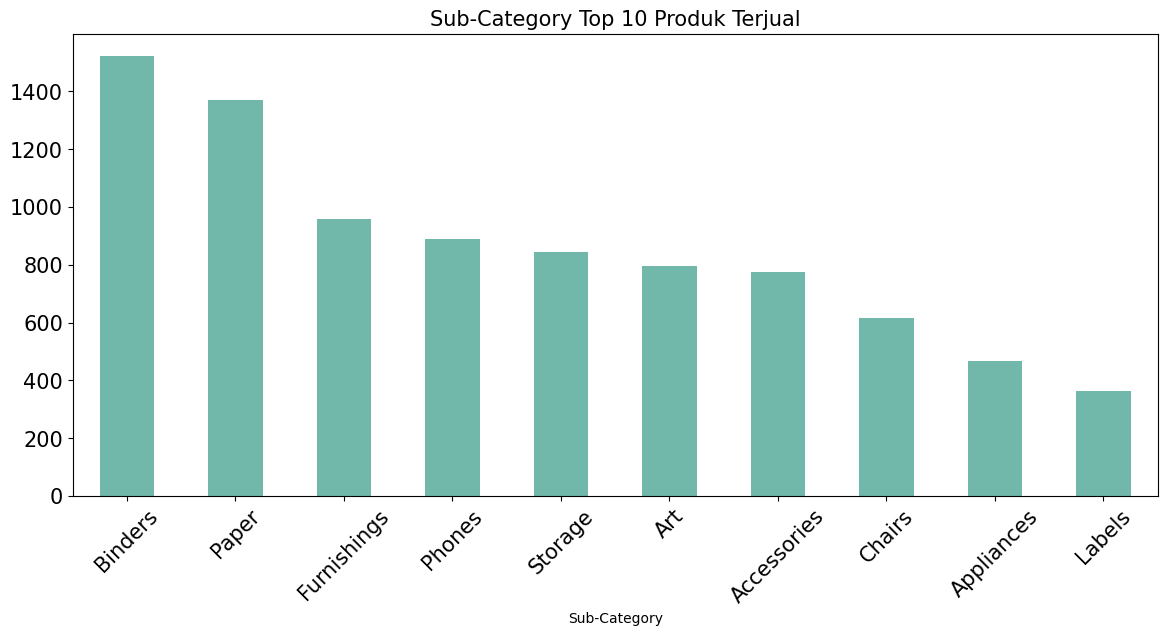

In [ ]:
plt.figure(figsize=(14, 6))  # Mengatur ukuran grafik
df['Sub-Category'].value_counts().head(10).plot(kind='bar', color='#71b8aa', fontsize=15)  # Menampilkan 10 besar
plt.xticks(rotation=45)  # Memutar label di sumbu X
plt.title("Sub-Category Top 10 Produk Terjual",fontsize=15)
plt.show()

<Axes: >

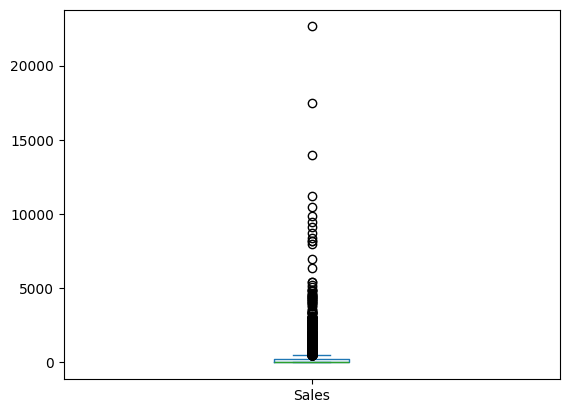

In [ ]:
df['Sales'].plot(kind='box')

In [ ]:
# prompt: cek banyak outlier variabel sales

import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)]
  return outliers

# Deteksi outlier pada variabel 'Sales'
outliers_sales = detect_outliers_iqr(df['Sales'])

# Jumlah outlier
num_outliers_sales = len(outliers_sales)
print(f"Jumlah outlier pada variabel Sales: {num_outliers_sales}")

Jumlah outlier pada variabel Sales: 1167


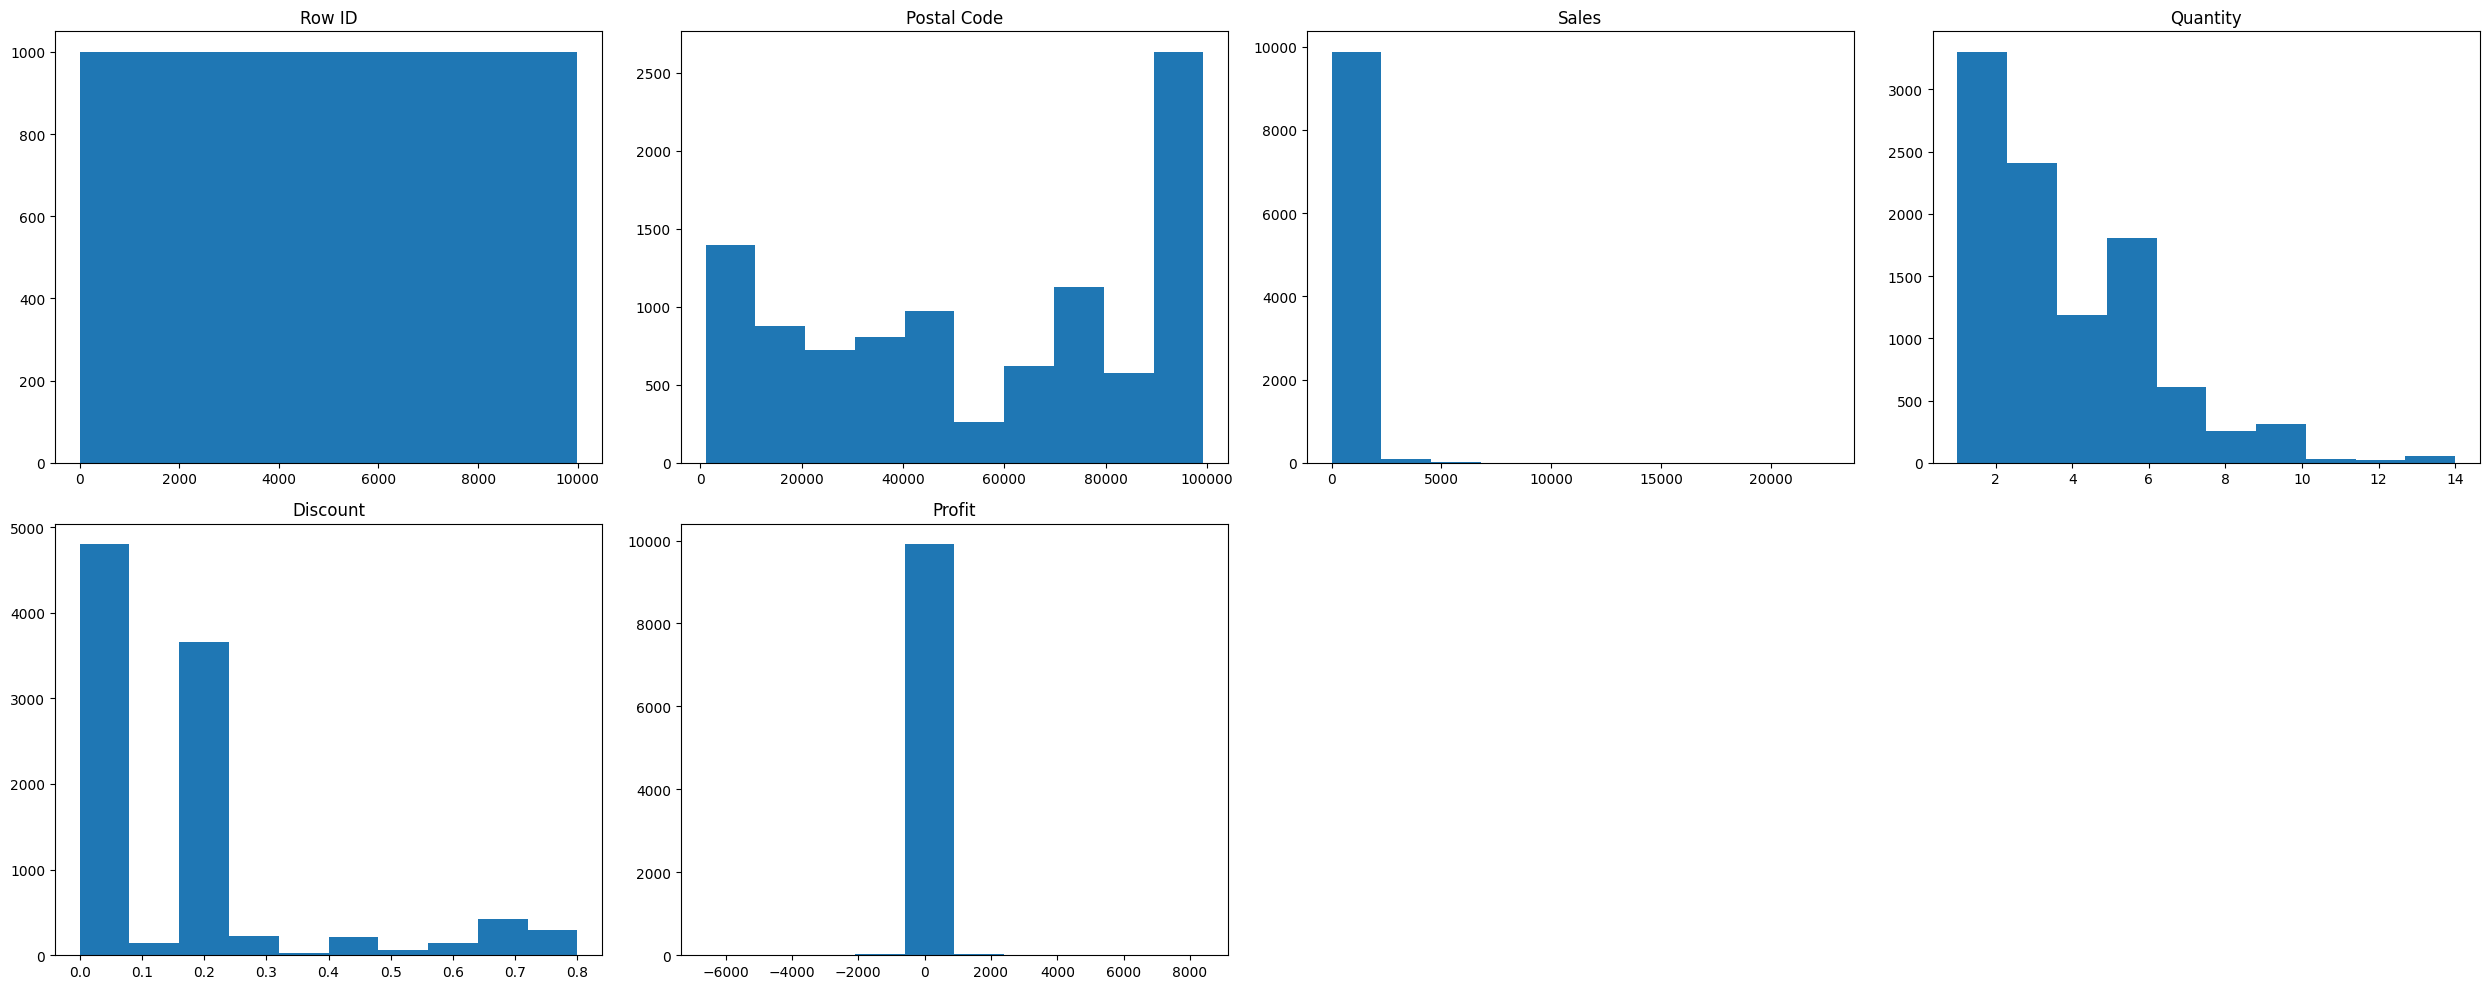

In [ ]:
import matplotlib.pyplot as plt

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=['number']).columns

# Hitung jumlah kolom numerik
num_cols = len(numeric_cols)

# Tentukan jumlah baris dan kolom subplot
num_rows = (num_cols + 2) // 3  # Bulatkan ke atas untuk mendapatkan jumlah baris yang cukup
num_cols_subplot = 4

# Buat subplot
fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(25, 5 * num_rows))

# Iterasi melalui kolom numerik dan buat histogram
for i, col in enumerate(numeric_cols):
    row = i // num_cols_subplot
    col_subplot = i % num_cols_subplot
    axes[row, col_subplot].hist(df[col].dropna(), bins=10)
    axes[row, col_subplot].set_title(col)

# Sembunyikan subplot yang tidak digunakan
for i in range(num_cols, num_rows * num_cols_subplot):
    row = i // num_cols_subplot
    col_subplot = i % num_cols_subplot
    fig.delaxes(axes[row, col_subplot])

plt.tight_layout()
plt.show()

**ANALISIS PRODUK**

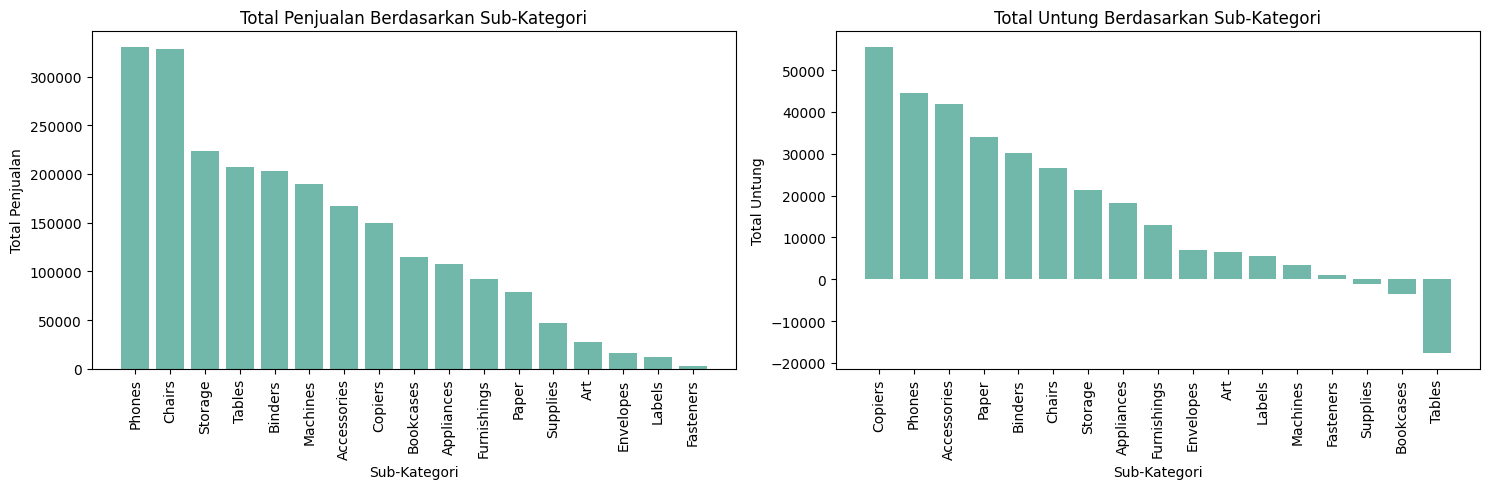

In [ ]:
# prompt: buat grafik batang berdasarkan variabel sub_kategori untuk melihat variabel penjualan dan untung, urutkan dari yang terbesar ke terkecil untuk masing masing grafik

import matplotlib.pyplot as plt

# Group by sub-category and calculate total sales and profit
sales_by_subcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False)

# Create bar charts
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart for total sales by sub-category
axes[0].bar(sales_by_subcategory.index, sales_by_subcategory.values, color='#71b8aa')
axes[0].set_title('Total Penjualan Berdasarkan Sub-Kategori')
axes[0].set_xlabel('Sub-Kategori')
axes[0].set_ylabel('Total Penjualan')
axes[0].tick_params(axis='x', rotation=90)

# Bar chart for total profit by sub-category
axes[1].bar(profit_by_subcategory.index, profit_by_subcategory.values, color='#71b8aa')
axes[1].set_title('Total Untung Berdasarkan Sub-Kategori')
axes[1].set_xlabel('Sub-Kategori')
axes[1].set_ylabel('Total Untung')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

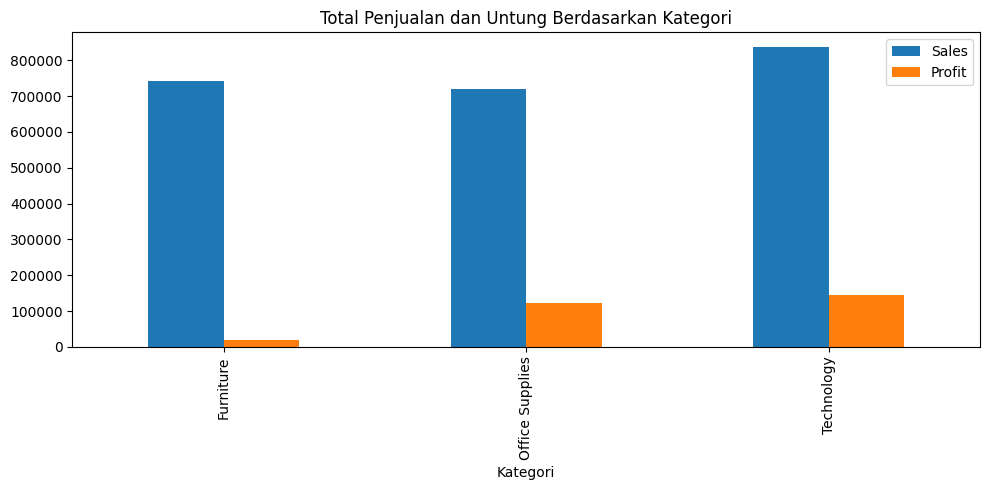

In [ ]:
# prompt: buat grafik batang berdasarkan variabel kategori untuk melihat penjualan dan untung yang dijadikan satu grafik batang

# Group by sub-category and calculate total sales and profit
sales_and_profit_by_subcategory = df.groupby('Category')[['Sales', 'Profit']].sum()

# Create a bar chart with grouped bars for sales and profit
ax = sales_and_profit_by_subcategory.plot(kind='bar', figsize=(10, 5))
ax.set_title('Total Penjualan dan Untung Berdasarkan Kategori')
ax.set_xlabel('Kategori')
ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()



*   Kategori technology dan perlengkapan kantor adalah kategori yang menghasilkan keuntungan tinggi dan bisa diprioritaskan untuk mendukung profitabilitas bisnis.
*   Kategori furniture memiliki penjualan yang tinggi namun keuntungan yang rendah, sehingga membutuhkan evaluasi strategi untuk meningkatkan profitabilitas, seperti melalui efisiensi biaya atau penyesuaian harga.



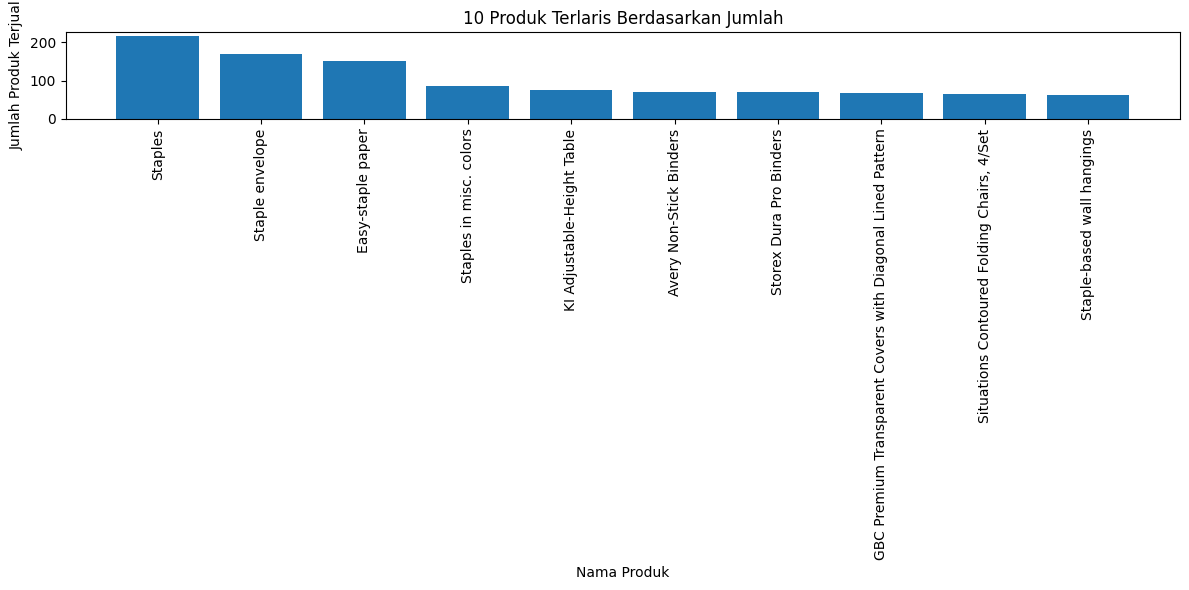

In [ ]:
# prompt: menampilkan grafik batang 10 produk yang paling banyak jumlahnya
import matplotlib.pyplot as plt
top_10_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_products.index, top_10_products.values)
plt.title('10 Produk Terlaris Berdasarkan Jumlah')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Produk Terjual')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
category = df.groupby("Category")[["Profit","Sales","Order ID"]]\
.agg({'Profit':'sum','Sales':'sum','Order ID':'count'})\
.reset_index()

category['percentage'] = (category['Profit'] / category['Sales'] * 100).round(2)

category.columns = ['Category', 'Profit', 'Sales','Number of Orders','Ratio of profit to sales']

category

fig = px.bar(category,
             x='Category',
             y=['Profit', 'Sales'],
             title='Profit and sales by Category',
             labels={'value': 'Amount', 'Region': 'Region', 'variable': 'Metric'},
             barmode='group',
             height=600)

# Update layout for better readability
fig.update_layout(legend_title_text='Metric')

# Show the figure
fig.show()

**ANALISIS WILAYAH**

In [ ]:
import plotly.express as px
states = df.groupby("State")[["Profit","Sales","Order ID"]].agg({'Profit':'sum','Sales':'sum','Order ID':'count'})\
.sort_values(by="Profit",ascending=False)\
.reset_index()[:10]

states.columns = ["State","Profit","Sales","Number of Orders"]
fig = px.bar(states,
            x= "State",
            y=["Profit","Sales"],
            title="Top 10 States in terms of profit and their sales",
            height=600,
            barmode="group")
fig.update_layout(legend_title_text='Metric')

fig.show()

In [ ]:
cities = df.groupby("City")[["Profit","Sales"]].agg({'Profit':'sum','Sales':'sum'})\
.sort_values(by="Profit",ascending=False)\
.reset_index()[:10]

fig = px.bar(cities,
            x= "City",
            y=["Profit","Sales"],
            title="Top 10 cities in terms of profit and their sales",
            height=600,
            barmode="group")
fig.update_layout(legend_title_text='Metric')

fig.show()

**ANALISIS DISKON**

In [ ]:
import plotly.express as px

# Mengelompokkan data berdasarkan "Discount" dan menghitung rata-rata profit serta jumlah order
df_discount = df.groupby("Discount")[["Profit", "Order ID"]].agg({'Profit': 'mean', 'Order ID': 'count'}).reset_index()

# Membuat diagram batang dengan ukuran yang lebih padat
fig = px.bar(
    data_frame=df_discount,
    x="Discount",
    y="Profit",
    title="Average Profit at each Discount",
    height=400,  # Tinggi grafik
    width=800    # Lebar grafik
)

# Memastikan semua nilai pada sumbu x terlihat
all_x_values = df_discount['Discount'].unique()

fig.update_xaxes(
    tickmode='array',
    tickvals=all_x_values,
    ticktext=all_x_values,
    tickangle=45  # Memiringkan teks untuk menjaga keterbacaan
)

# Menyesuaikan tata letak agar lebih kompak
fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),  # Margin lebih kecil
    font=dict(size=12),  # Ukuran font lebih kecil
)

fig.show()

## Tahap 2 : Validasi Data


### Validasi missing value

In [ ]:
sum_missing_data = missing_data.sum()
print("Jumlah Missing Data di setiap kolom:", sum_missing_data)

Jumlah Missing Data di setiap kolom: 0


Tidak teerdapat data yang missing dalam dataset, sehingga tidak diperlukan penanganan missing value.

### Validasi data duplikat

In [ ]:
duplicate_data = df.duplicated().sum()
print(f"Jumlah Data Duplikat: {duplicate_data}")

Jumlah Data Duplikat: 0


Hasil pengecekan data duplikat menunjukkan bahwa tidak terdapat data yang duplikat.

### Validasi outlier

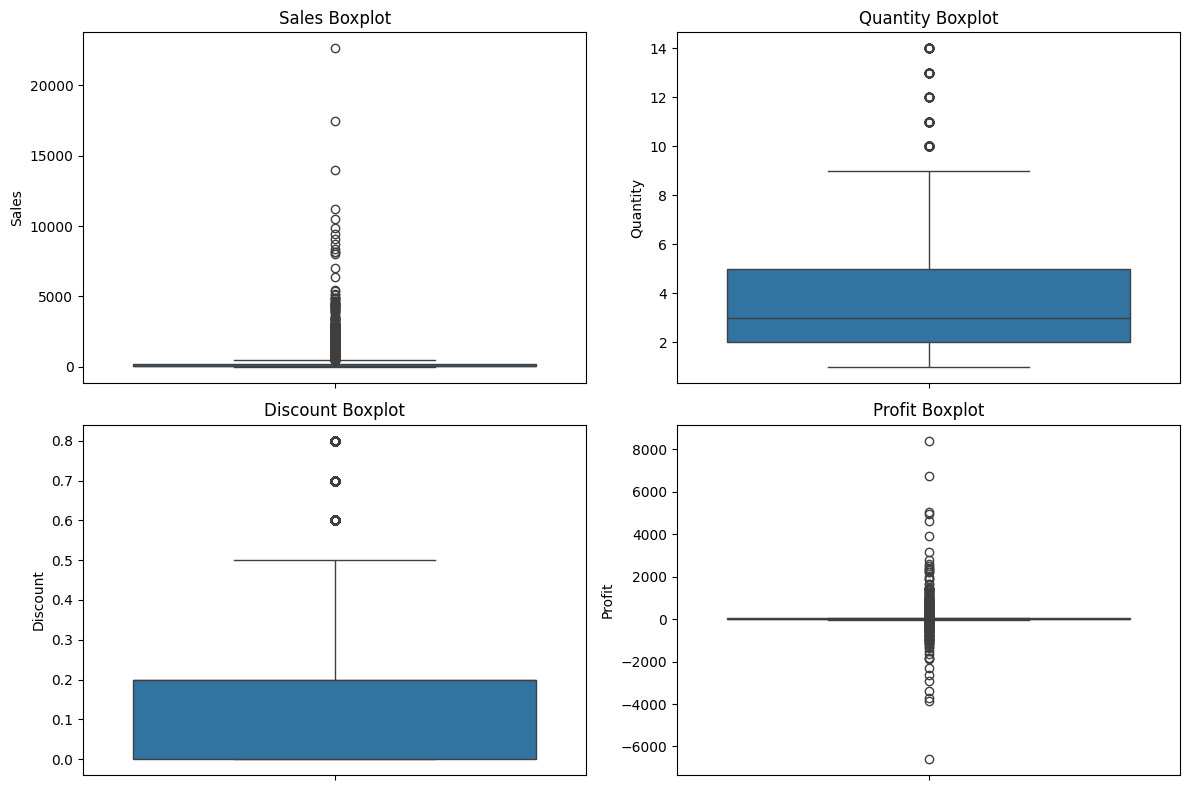

In [ ]:
# prompt: buat boxplot terpisah unuk 4 variabel yaitu sales, quantity, discount, dan profit

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame as defined in the provided code

# Create separate boxplots for Sales, Quantity, Discount, and Profit
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot for Sales
sns.boxplot(y='Sales', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sales Boxplot')

# Boxplot for Quantity
sns.boxplot(y='Quantity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Quantity Boxplot')

# Boxplot for Discount
sns.boxplot(y='Discount', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Discount Boxplot')

# Boxplot for Profit
sns.boxplot(y='Profit', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Profit Boxplot')

plt.tight_layout()
plt.show()

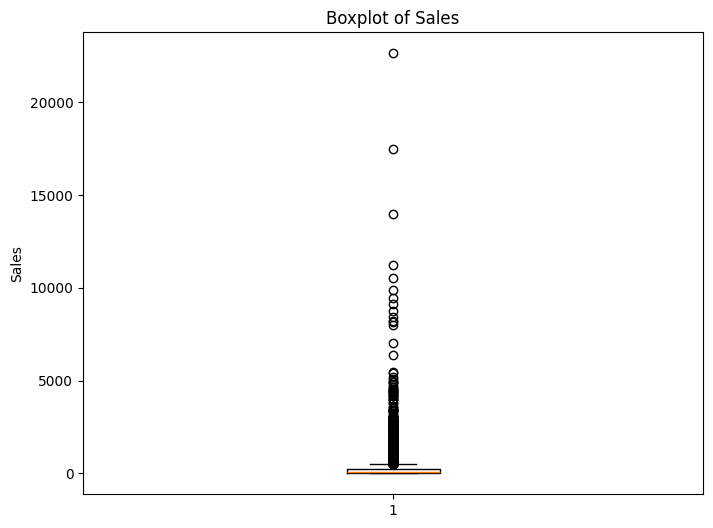

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'])
plt.title('Boxplot of Sales')
plt.ylabel('Sales')
plt.show()

In [ ]:
df[df['Sales'] == 22638.48]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,2014-03-18,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784


Setelah ditelaah lebih lanjut, penjualan tertinggi merupakan hasil penjualan produk teknologi dengan kuantitas sebanyak 6 unit. Outlier tersebut mungkin wajar karena harga produk yang cukup tinggi. Oleh karena itu, tidak dilakukan penanganan terhadap data outlier, dengan alasan bahwa penghapusan nilai penjualan tersebut dapat menghilangkan karakteristik penting dari data penjualan.

## Tahap 3 : Penentuan Objek Data
Pada tahap ini akan dilakukan penentuan objek data yang akan digunakan dalam analisis.

In [ ]:
df = df.drop(['Order Date','Row ID', 'Ship Date', 'Customer Name', 'Postal Code',
              'Product ID',  'Product Name', 'Country','City','Region','Sub-Category','Customer ID'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Order ID   9994 non-null   object 
 1   Ship Mode  9994 non-null   object 
 2   Segment    9994 non-null   object 
 3   State      9994 non-null   object 
 4   Category   9994 non-null   object 
 5   Sales      9994 non-null   float64
 6   Quantity   9994 non-null   int64  
 7   Discount   9994 non-null   float64
 8   Profit     9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


## Tahap 4 : Hasil Pre-Processing

Setelah dilakukan pengecekan, dataset tidak memiliki data yang hilang, data duplikat, maupun outlier. Dataset tersebut terdiri dari 21 fitur dengan jenis data float64 (3 atribut), int64 (3 atribut), dan object (15 atribut). Selanjutnya, dilakukan penghapusan atribut yang tidak relevan untuk pemodelan, sehingga fitur yang tersisa dalam dataset berjumlah 13.

### Menghapus atribut tidak penting

In [ ]:
df_final=df.copy()

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Order ID   9994 non-null   object 
 1   Ship Mode  9994 non-null   object 
 2   Segment    9994 non-null   object 
 3   State      9994 non-null   object 
 4   Category   9994 non-null   object 
 5   Sales      9994 non-null   float64
 6   Quantity   9994 non-null   int64  
 7   Discount   9994 non-null   float64
 8   Profit     9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


## Tahap 5 : Kontruksi Data


### One-Hot Encoding

In [ ]:
df_final = pd.get_dummies(df_final, columns=['Category'], prefix=['Category'])
boolean_columns = df_final.select_dtypes(include=['bool']).columns
df_final[boolean_columns] = df_final[boolean_columns].astype(int)
df_final.head()

,Order ID,Ship Mode,Segment,State,Sales,Quantity,Discount,Profit,Category_Furniture,Category_Office Supplies,Category_Technology
0,CA-2016-152156,Second Class,Consumer,Kentucky,261.9600,2,0.00,41.9136,1,0,0
1,CA-2016-152156,Second Class,Consumer,Kentucky,731.9400,3,0.00,219.5820,1,0,0
2,CA-2016-138688,Second Class,Corporate,California,14.6200,2,0.00,6.8714,0,1,0
3,US-2015-108966,Standard Class,Consumer,Florida,957.5775,5,0.45,-383.0310,1,0,0
4,US-2015-108966,Standard Class,Consumer,Florida,22.3680,2,0.20,2.5164,0,1,0


menampilkan transaksi berdasarkan ID CA-2016-152156 sebelum di gabung.

In [ ]:
df_final[df_final['Order ID']=='CA-2016-152156']

,Order ID,Ship Mode,Segment,State,Sales,Quantity,Discount,Profit,Category_Furniture,Category_Office Supplies,Category_Technology
0,CA-2016-152156,Second Class,Consumer,Kentucky,261.96,2,0.0,41.9136,1,0,0
1,CA-2016-152156,Second Class,Consumer,Kentucky,731.94,3,0.0,219.5820,1,0,0


In [ ]:
# Group by 'Order ID' and aggregate the desired columns
df_grouped = df_final.groupby('Order ID').agg({
    'Discount': 'sum',
    'Quantity': 'sum',
    'Sales': 'sum',
    'Category_Furniture': 'sum',
    'Category_Office Supplies': 'sum',
    'Category_Technology': 'sum',
    'Profit': 'sum'
}).reset_index() # Reset the index to make 'Order ID' a regular column

# Create a new DataFrame with the grouped data and the rest of the original columns
df_new = pd.DataFrame()
for column in df_final.columns:
  if column == 'Order ID':
    df_new['Order ID'] = df_final['Order ID'].unique()
  elif column not in ['Discount', 'Quantity', 'Sales', 'Category_Furniture', 'Category_Office Supplies', 'Category_Technology', 'Profit']:
    df_new[column] = df_final.groupby('Order ID')[column].first().values # Extract values to avoid index alignment issues

# Merge the new DataFrame with the aggregated data
df_final = pd.merge(df_new, df_grouped, on='Order ID', how='left')
df_final.shape
hasil_cluster=df_final.copy()

menampilkan transaksi berdasarkan ID CA-2016-152156 sesudah di gabung.

In [ ]:
df_final[df_final['Order ID']=='CA-2016-152156']

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit
0,CA-2016-152156,Standard Class,Consumer,New York,0.0,5,993.9,2,0,0,261.4956


In [ ]:
df_final.head(10)

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit
0,CA-2016-152156,Standard Class,Consumer,New York,0.00,5,993.9000,2,0,0,261.4956
1,CA-2016-138688,Standard Class,Corporate,California,0.00,2,14.6200,0,1,0,6.8714
2,US-2015-108966,Standard Class,Home Office,Florida,0.65,7,979.9455,1,1,0,-380.5146
3,CA-2014-115812,Standard Class,Consumer,New York,0.80,38,3714.3040,2,3,2,300.7687
4,CA-2017-114412,Standard Class,Corporate,Arizona,0.20,3,15.5520,0,1,0,5.4432
5,CA-2016-161389,Standard Class,Consumer,New York,0.20,3,407.9760,0,1,0,132.5922
6,US-2015-118983,Standard Class,Consumer,Texas,1.60,8,71.3540,0,2,0,-127.6740
7,CA-2014-105893,Second Class,Consumer,Virginia,0.00,6,665.8800,0,1,0,13.3176
8,CA-2014-167164,Standard Class,Corporate,Michigan,0.00,2,55.5000,0,1,0,9.9900
9,CA-2014-143336,Second Class,Consumer,California,0.40,9,244.7600,0,2,1,25.8774


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  5009 non-null   object 
 1   Ship Mode                 5009 non-null   object 
 2   Segment                   5009 non-null   object 
 3   State                     5009 non-null   object 
 4   Discount                  5009 non-null   float64
 5   Quantity                  5009 non-null   int64  
 6   Sales                     5009 non-null   float64
 7   Category_Furniture        5009 non-null   int64  
 8   Category_Office Supplies  5009 non-null   int64  
 9   Category_Technology       5009 non-null   int64  
 10  Profit                    5009 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 430.6+ KB


### Label Encoder
Dilakukan label encoding, yaitu mengubah data kategorik menjadi format numerik untuk memudahkan proses klasterisasi. Fitur yang diubah meliputi `Ship Mode`, `Segment`, dan `City`.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_ship_mode = LabelEncoder()
le_segment = LabelEncoder()
le_state = LabelEncoder()

df_final['Ship Mode'] = le_ship_mode.fit_transform(df_final['Ship Mode'])
df_final['Segment'] = le_segment.fit_transform(df_final['Segment'])
df_final['State'] = le_state.fit_transform(df_final['State'])

In [ ]:
df_final.head(10)

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit
0,CA-2016-152156,3,0,30,0.00,5,993.9000,2,0,0,261.4956
1,CA-2016-138688,3,1,3,0.00,2,14.6200,0,1,0,6.8714
2,US-2015-108966,3,2,8,0.65,7,979.9455,1,1,0,-380.5146
3,CA-2014-115812,3,0,30,0.80,38,3714.3040,2,3,2,300.7687
4,CA-2017-114412,3,1,1,0.20,3,15.5520,0,1,0,5.4432
5,CA-2016-161389,3,0,30,0.20,3,407.9760,0,1,0,132.5922
6,US-2015-118983,3,0,41,1.60,8,71.3540,0,2,0,-127.6740
7,CA-2014-105893,2,0,44,0.00,6,665.8800,0,1,0,13.3176
8,CA-2014-167164,3,1,20,0.00,2,55.5000,0,1,0,9.9900
9,CA-2014-143336,2,0,3,0.40,9,244.7600,0,2,1,25.8774


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  5009 non-null   object 
 1   Ship Mode                 5009 non-null   int64  
 2   Segment                   5009 non-null   int64  
 3   State                     5009 non-null   int64  
 4   Discount                  5009 non-null   float64
 5   Quantity                  5009 non-null   int64  
 6   Sales                     5009 non-null   float64
 7   Category_Furniture        5009 non-null   int64  
 8   Category_Office Supplies  5009 non-null   int64  
 9   Category_Technology       5009 non-null   int64  
 10  Profit                    5009 non-null   float64
dtypes: float64(3), int64(7), object(1)
memory usage: 430.6+ KB


### Transformasi data
Pada tahap ini, dilakukan transformasi data menggunakan feature scaling dengan tujuan agar semua fitur memiliki pengaruh yang sama dalam menentukan kelompok data. Tanpa scaling, fitur dengan nilai yang lebih besar dapat mempengaruhi hasil clustering lebih besar daripada fitur dengan nilai lebih kecil. Dengan scaling, semua fitur berada pada skala yang sama, sehingga jarak antar data dihitung secara adil.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_final[['Sales', 'Quantity','Discount', 'Profit']] = scaler.fit_transform(df_final[['Sales', 'Quantity','Discount', 'Profit']])
df_final.head(3)

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit
0,CA-2016-152156,3,0,30,-0.671271,-0.411774,0.560722,2,0,0,0.592395
1,CA-2016-138688,3,1,3,-0.671271,-0.894134,-0.465093,0,1,0,-0.145853
2,US-2015-108966,3,2,8,0.728749,-0.090200,0.546105,1,1,0,-1.269025


In [ ]:
df_cluster = df_final.drop(['Order ID'], axis=1)
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ship Mode                 5009 non-null   int64  
 1   Segment                   5009 non-null   int64  
 2   State                     5009 non-null   int64  
 3   Discount                  5009 non-null   float64
 4   Quantity                  5009 non-null   float64
 5   Sales                     5009 non-null   float64
 6   Category_Furniture        5009 non-null   int64  
 7   Category_Office Supplies  5009 non-null   int64  
 8   Category_Technology       5009 non-null   int64  
 9   Profit                    5009 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 391.5 KB


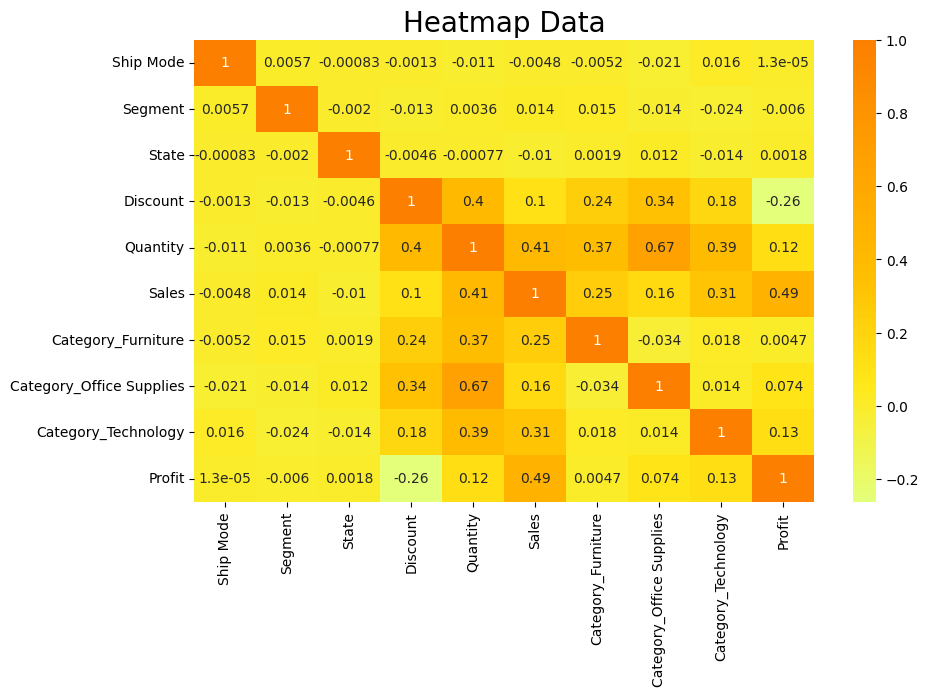

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt # Import pyplot specifically

plt.figure(figsize=(10,6)) # Now plt refers to matplotlib.pyplot
sns.heatmap(df_cluster.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

# Pemodelan
Pada tahap pemodelan ini dataset akan dikelompokkan menggunakan metode K-Means Clustering. Tujuan pengelompokan ini untuk mengetahui bagaimana karakteristik dari masing-masing segmen pelanggan.

In [ ]:
# Memodelkan dataset dengan cluster yang sudah ditentukan yaitu 3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
cluster = KMeans(n_clusters=3)
cluster.fit(df_cluster)

KMeans(n_clusters=3)

menyatukan kolom hasil cluster dengan dataframe awal dan mengembalikan nilai yang di transform

In [ ]:
# Menambahkan kolom baru berupa hasil cluster pelanggan
klaster = pd.Series(cluster.labels_, name="Cluster")
# Menggabungkan data awal dengan data hasil segmentasi pelanggan
df_final=pd.concat([df_final, klaster], axis=1)
df_final[['Sales', 'Quantity','Discount', 'Profit']] = scaler.inverse_transform(df_final[['Sales', 'Quantity','Discount', 'Profit']])
df_final.head()

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster
0,CA-2016-152156,3,0,30,0.00,5.0,993.9000,2,0,0,261.4956,0
1,CA-2016-138688,3,1,3,0.00,2.0,14.6200,0,1,0,6.8714,1
2,US-2015-108966,3,2,8,0.65,7.0,979.9455,1,1,0,-380.5146,1
3,CA-2014-115812,3,0,30,0.80,38.0,3714.3040,2,3,2,300.7687,0
4,CA-2017-114412,3,1,1,0.20,3.0,15.5520,0,1,0,5.4432,1


### Menentukan Nilai Optimal K (kelompok)

Menentukan nilai optimal K (kelompok) dengan Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluster terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik.

In [ ]:
Sum_of_squared_error = []
K = range(2,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    Sum_of_squared_error.append(km.inertia_)

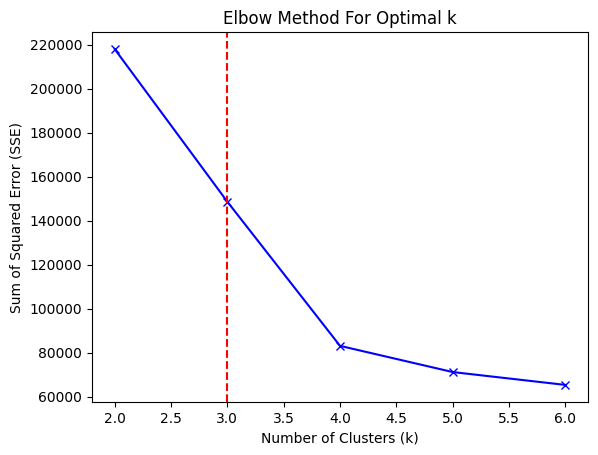

In [ ]:
# prompt: buatkan elbow plot dengan garis pemilihan n_cluster terbaik

import matplotlib.pyplot as plt
# Plotting the Elbow Method chart
plt.plot(K, Sum_of_squared_error, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Method For Optimal k')

# Adding a vertical line to visually indicate the "elbow" point
# You might need to adjust the x-coordinate based on your chart
plt.axvline(x=3, color='red', linestyle='--')

plt.show()

In [ ]:
range_n_clusters = range(2,7)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(df_cluster)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_cluster, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6985841398002187
For n_clusters = 3, silhouette score is 0.5655909346534571
For n_clusters = 4, silhouette score is 0.512091387960257
For n_clusters = 5, silhouette score is 0.5096295461821789
For n_clusters = 6, silhouette score is 0.4484536685962286


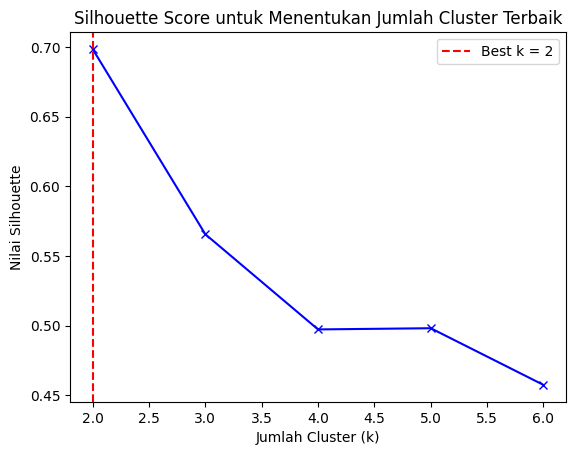

In [ ]:
# prompt: buatkan silhouette score plot dengan garis pemilihan n_cluster terbaik

range_n_clusters = range(2, 7)
silhouette_avg = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(df_cluster)
    silhouette_avg.append(silhouette_score(df_cluster, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Nilai Silhouette')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Terbaik')

# Mencari nilai k dengan silhouette score tertinggi
best_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')
plt.legend()
plt.show()

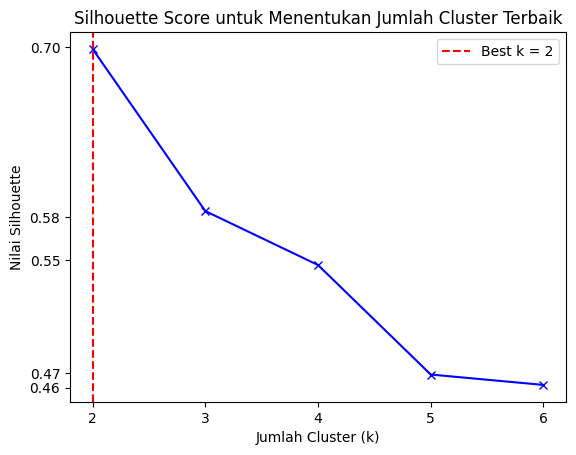

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 7)
silhouette_avg = []

# Asumsi df_cluster adalah data yang sudah di-preprocess
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df_cluster)
    silhouette_avg.append(silhouette_score(df_cluster, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Nilai Silhouette')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Terbaik')

# Menampilkan nilai k terbaik
best_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k = {best_k}')

# Mengatur sumbu agar tidak ada angka desimal
plt.xticks(range_n_clusters)
plt.yticks([round(s, 2) for s in silhouette_avg])

plt.legend()
plt.show()

### Hasil Clustering

Mengembalikan variabel ship mode, segment, dan state ke data awal

In [ ]:
cluster_map = {'0': 'Cluster 1', '1': 'Cluster 2', '2': 'Cluster 3'}
df_final['Cluster'] = df_final['Cluster'].astype(str).map(cluster_map)

In [ ]:
df_final['Ship Mode'] = le_ship_mode.inverse_transform(df_final['Ship Mode'])
df_final['Segment'] = le_segment.inverse_transform(df_final['Segment'])
df_final['State'] = le_state.inverse_transform(df_final['State'])

In [ ]:
# Menampilkan 5 data teratas dari cluster 1
df_final[df_final["Cluster"]=='Cluster 1'][:5]

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster
1,CA-2016-138688,Standard Class,Corporate,California,0.00,2.0,14.6200,0,1,0,6.8714,Cluster 1
2,US-2015-108966,Standard Class,Home Office,Florida,0.65,7.0,979.9455,1,1,0,-380.5146,Cluster 1
4,CA-2017-114412,Standard Class,Corporate,Arizona,0.20,3.0,15.5520,0,1,0,5.4432,Cluster 1
9,CA-2014-143336,Second Class,Consumer,California,0.40,9.0,244.7600,0,2,1,25.8774,Cluster 1
10,CA-2016-137330,Standard Class,Home Office,California,0.00,14.0,79.8000,0,2,0,20.7480,Cluster 1


In [ ]:
 # Menampilkan 5 data teratas dari cluster 2
df_final[df_final["Cluster"]=='Cluster 2'][:5]

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster
0,CA-2016-152156,Standard Class,Consumer,New York,0.0,5.0,993.900,2,0,0,261.4956,Cluster 2
3,CA-2014-115812,Standard Class,Consumer,New York,0.8,38.0,3714.304,2,3,2,300.7687,Cluster 2
5,CA-2016-161389,Standard Class,Consumer,New York,0.2,3.0,407.976,0,1,0,132.5922,Cluster 2
8,CA-2014-167164,Standard Class,Corporate,Michigan,0.0,2.0,55.500,0,1,0,9.9900,Cluster 2
11,US-2017-156909,Standard Class,Home Office,New Mexico,0.3,2.0,71.372,1,0,0,-1.0196,Cluster 2


In [ ]:
# Menampilkan 5 data teratas dari cluster 3
df_final[df_final["Cluster"]=='Cluster 3'][:5]

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster
6,US-2015-118983,Standard Class,Consumer,Texas,1.60,8.0,71.3540,0,2,0,-127.6740,Cluster 3
7,CA-2014-105893,Second Class,Consumer,Virginia,0.00,6.0,665.8800,0,1,0,13.3176,Cluster 3
13,CA-2016-121755,Standard Class,Corporate,Virginia,0.20,5.0,102.2180,0,1,1,15.9965,Cluster 3
14,US-2015-150630,Second Class,Home Office,Utah,2.70,28.0,3329.4340,2,5,0,-1647.9386,Cluster 3
17,CA-2015-117415,Second Class,Consumer,Virginia,1.02,19.0,1228.9532,2,1,1,15.0480,Cluster 3


In [ ]:
df_final.head(10)

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster
0,CA-2016-152156,Standard Class,Consumer,New York,0.00,5.0,993.9000,2,0,0,261.4956,Cluster 2
1,CA-2016-138688,Standard Class,Corporate,California,0.00,2.0,14.6200,0,1,0,6.8714,Cluster 1
2,US-2015-108966,Standard Class,Home Office,Florida,0.65,7.0,979.9455,1,1,0,-380.5146,Cluster 1
3,CA-2014-115812,Standard Class,Consumer,New York,0.80,38.0,3714.3040,2,3,2,300.7687,Cluster 2
4,CA-2017-114412,Standard Class,Corporate,Arizona,0.20,3.0,15.5520,0,1,0,5.4432,Cluster 1
5,CA-2016-161389,Standard Class,Consumer,New York,0.20,3.0,407.9760,0,1,0,132.5922,Cluster 2
6,US-2015-118983,Standard Class,Consumer,Texas,1.60,8.0,71.3540,0,2,0,-127.6740,Cluster 3
7,CA-2014-105893,Second Class,Consumer,Virginia,0.00,6.0,665.8800,0,1,0,13.3176,Cluster 3
8,CA-2014-167164,Standard Class,Corporate,Michigan,0.00,2.0,55.5000,0,1,0,9.9900,Cluster 2
9,CA-2014-143336,Second Class,Consumer,California,0.40,9.0,244.7600,0,2,1,25.8774,Cluster 1


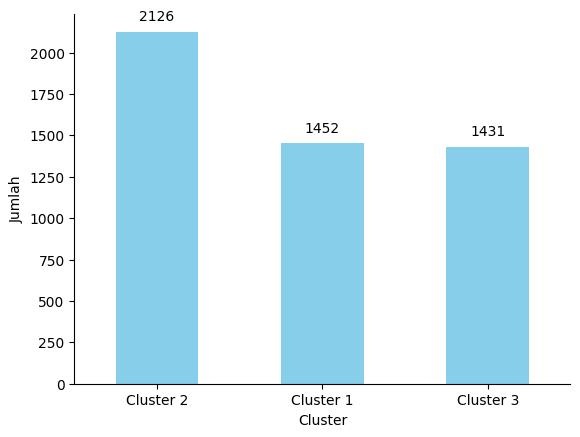

In [ ]:
import matplotlib.pyplot as plt

# Plot jumlah cluster
cluster_counts = df_final['Cluster'].value_counts()
ax = cluster_counts.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label
# plt.title('Jumlah Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
plt.xticks(rotation=0)

# Menambahkan jumlah di atas setiap batang
for idx, value in enumerate(cluster_counts):
    plt.text(idx, value + 50, str(value), ha='center', va='bottom')

plt.show()


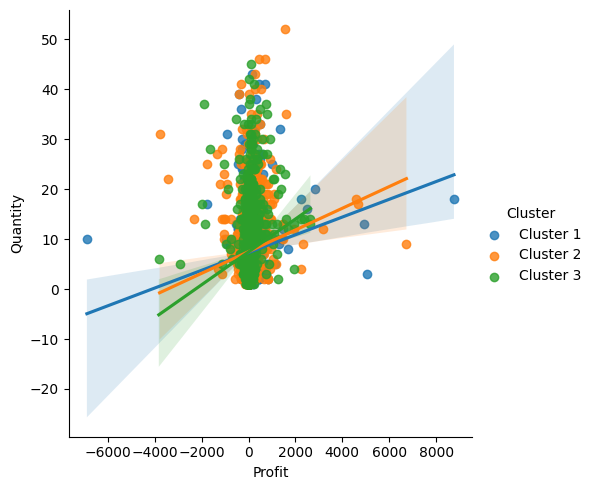

In [ ]:
sns.lmplot(x='Profit', y='Quantity', data=df_final, hue='Cluster')

cluster 1 cenderung memiliki penjualan dan kuantitas tertinggi

In [ ]:
import pandas as pd

# Contoh dataframe df_final (pastikan Anda memiliki kolom 'Cluster' dan metrik-metrik lainnya)
# df_final = pd.read_csv('your_dataset.csv')

# Membuat statistik deskriptif per cluster
descriptive_stats = df_final.groupby('Cluster').agg({
    'Sales': ['mean', 'median', 'std', 'min', 'max'],  # Statistik deskriptif untuk 'Sales'
    'Profit': ['mean', 'median', 'std', 'min', 'max'],  # Statistik deskriptif untuk 'Profit'
    'Quantity': ['mean', 'median', 'std', 'min', 'max'],  # Statistik deskriptif untuk 'Quantity'
    'Discount': ['mean', 'median', 'min', 'max'],       # Statistik deskriptif untuk 'Discount'
    'Category_Furniture': ['sum'],                     # Total kategori 'Furniture'
    'Category_Office Supplies': ['sum'],               # Total kategori 'Office Supplies'
    'Category_Technology': ['sum']                     # Total kategori 'Technology'
})

# Memberi nama ulang pada kolom agar lebih rapi
descriptive_stats.columns = ['_'.join(col).strip() for col in descriptive_stats.columns]
descriptive_stats.reset_index(inplace=True)

# Konfigurasi tampilan Pandas
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', None)       # Menonaktifkan batas lebar tampilan
pd.set_option('display.max_rows', None)    # Menampilkan semua baris jika ada banyak

# Menampilkan statistik deskriptif
print(descriptive_stats)

     Cluster  Sales_mean  Sales_median    Sales_std  Sales_min  Sales_max  Profit_mean  \
0  Cluster 1  450.676964       155.942   937.897415      1.080  18336.740    66.713144   
1  Cluster 2  470.430645       149.965  1013.544917      0.556  23661.228    54.655959   
2  Cluster 3  449.114157       152.590   879.049233      0.852  10539.896    51.244561   

   Profit_median  Profit_std  Profit_min  Profit_max  Quantity_mean  Quantity_median  \
0        16.9808  408.775857  -6892.3748   8762.3891       7.431818              6.0   
1        15.5385  330.795240  -3791.1634   6734.4720       7.614299              6.0   
2        17.2200  290.500257  -3825.3394   2640.4798       7.612858              6.0   

   Quantity_std  Quantity_min  Quantity_max  Discount_mean  Discount_median  Discount_min  \
0      5.967189           1.0          43.0       0.303003              0.2           0.0   
1      6.213902           1.0          52.0       0.314911              0.2           0.0   
2      

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order ID                  5009 non-null   object 
 1   Ship Mode                 5009 non-null   object 
 2   Segment                   5009 non-null   object 
 3   State                     5009 non-null   object 
 4   Discount                  5009 non-null   float64
 5   Quantity                  5009 non-null   float64
 6   Sales                     5009 non-null   float64
 7   Category_Furniture        5009 non-null   int64  
 8   Category_Office Supplies  5009 non-null   int64  
 9   Category_Technology       5009 non-null   int64  
 10  Profit                    5009 non-null   float64
 11  Cluster                   5009 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 469.7+ KB


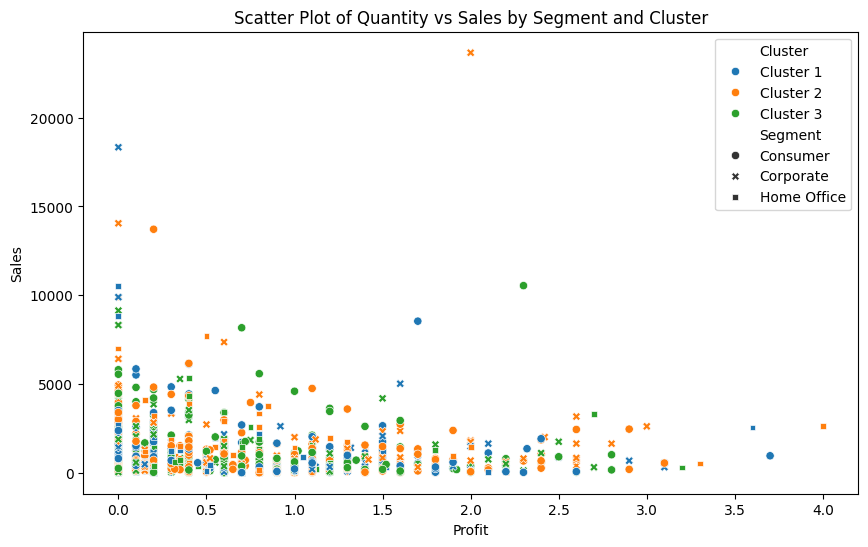

In [ ]:
# prompt: build scaterplot Quantity vs Sales base on Segment for every Cluster in 1 plot

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', hue='Cluster', style='Segment', data=df_final)
plt.title('Scatter Plot of Quantity vs Sales by Segment and Cluster')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()

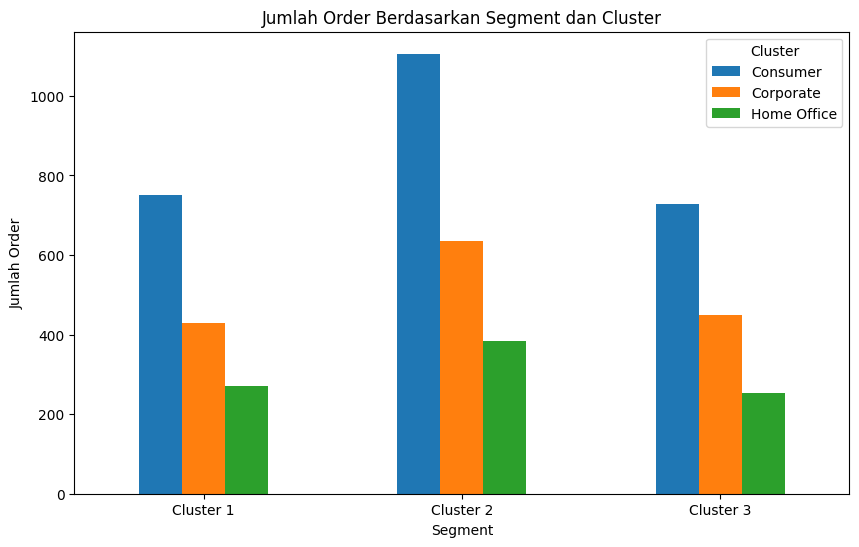

In [ ]:
segment_cluster_counts = df_final.groupby(['Cluster', 'Segment'])['Order ID'].count().unstack()
ax = segment_cluster_counts.plot(kind='bar', figsize=(10, 6), )
plt.xlabel('Segment')
plt.ylabel('Jumlah Order')
plt.title('Jumlah Order Berdasarkan Segment dan Cluster')
plt.xticks(rotation=0)
plt.legend(title='Cluster')
plt.show()

In [ ]:
df_final.head()

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster
0,CA-2016-152156,Standard Class,Consumer,New York,0.00,5.0,993.9000,2,0,0,261.4956,Cluster 3
1,CA-2016-138688,Standard Class,Corporate,California,0.00,2.0,14.6200,0,1,0,6.8714,Cluster 2
2,US-2015-108966,Standard Class,Home Office,Florida,0.65,7.0,979.9455,1,1,0,-380.5146,Cluster 2
3,CA-2014-115812,Standard Class,Consumer,New York,0.80,38.0,3714.3040,2,3,2,300.7687,Cluster 3
4,CA-2017-114412,Standard Class,Corporate,Arizona,0.20,3.0,15.5520,0,1,0,5.4432,Cluster 2


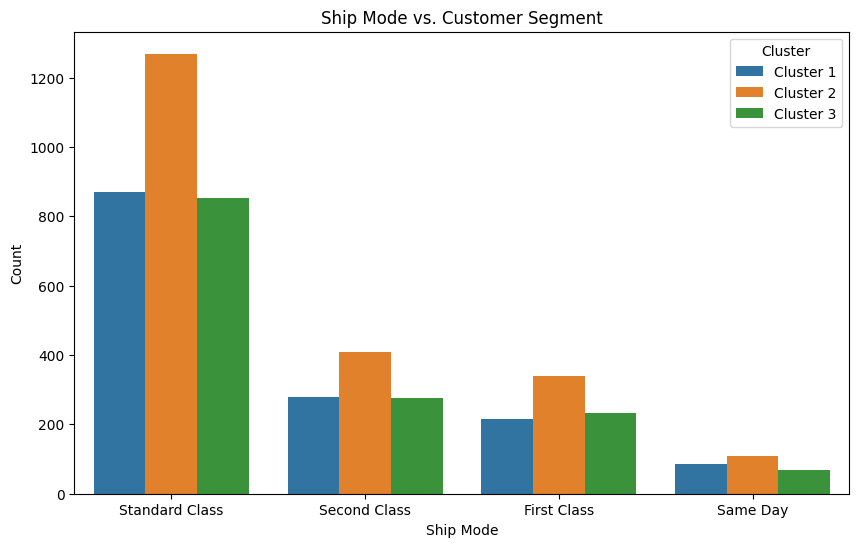

In [ ]:
# prompt: build plot for Ship Mode vs Consumer

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode', hue='Cluster', data=df_final)
plt.title('Ship Mode vs. Customer Segment')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

In [ ]:
df_final.columns

Index(['Order ID', 'Ship Mode', 'Segment', 'State', 'Discount', 'Quantity',
       'Sales', 'Category_Furniture', 'Category_Office Supplies',
       'Category_Technology', 'Profit', 'Cluster'],
      dtype='object')

In [ ]:
# prompt: jumlahkan Category_Furniture', 'Category_Office Supplies',
#        'Category_Technology' untuk tiap Cluster

# Group by 'Cluster' and sum 'Category_Furniture', 'Category_Office Supplies', and 'Category_Technology'
category_sums_by_cluster = df_final.groupby('Cluster').agg({
    'Category_Furniture': 'sum',
    'Category_Office Supplies': 'sum',
    'Category_Technology': 'sum'
})

category_sums_by_cluster

,Category_Furniture,Category_Office Supplies,Category_Technology
Cluster,,,
Cluster 1,891,2529,820
Cluster 2,613,1748,506
Cluster 3,617,1749,521


In [ ]:
# prompt: jumlahkan Category_Furniture', 'Category_Office Supplies',
#        'Category_Technology' untuk tiap Cluster

# Group by 'Cluster' and sum 'Category_Furniture', 'Category_Office Supplies', and 'Category_Technology'
category_sums_by_cluster = df_final.groupby('Cluster').agg({
    'Category_Furniture': 'sum',
    'Category_Office Supplies': 'sum',
    'Category_Technology': 'sum'
})

category_sums_by_cluster

,Category_Furniture,Category_Office Supplies,Category_Technology
Cluster,,,
Cluster 1,613,1748,506
Cluster 2,891,2529,820
Cluster 3,617,1749,521


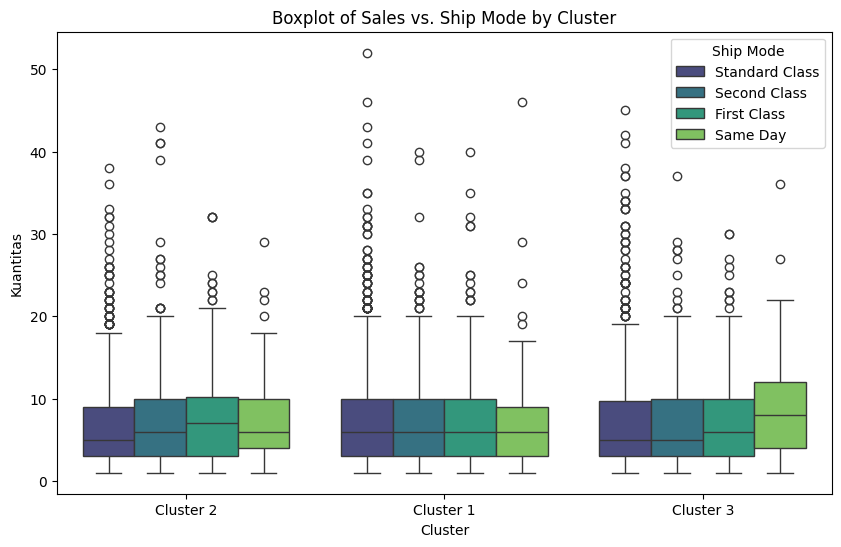

In [ ]:
# prompt: buat boxplot Sales vs Ship Mode berdasarkan Cluster

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Quantity', hue='Ship Mode', data=df_final, palette='viridis')
plt.title('Boxplot of Sales vs. Ship Mode by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Kuantitas')
plt.show()

In [ ]:
mean_quantity_per_cluster = df_final.groupby('Cluster')['Quantity'].describe()
mean_quantity_per_cluster

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Cluster 1,2126.0,7.614299,6.213902,1.0,3.0,6.0,10.0,52.0
Cluster 2,1452.0,7.431818,5.967189,1.0,3.0,6.0,10.0,43.0
Cluster 3,1431.0,7.612858,6.477585,1.0,3.0,6.0,10.0,45.0


In [ ]:
mean_sales_per_cluster = df_final.groupby('Cluster')['Sales'].describe()
mean_sales_per_cluster

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Cluster 1,2126.0,470.430645,1013.544917,0.556,35.9910,149.965,536.4500,23661.228
Cluster 2,1452.0,450.676964,937.897415,1.080,37.5385,155.942,498.1775,18336.740
Cluster 3,1431.0,449.114157,879.049233,0.852,39.8120,152.590,479.0200,10539.896


# Visualisasi Mapping

Menambahkan kode untuk setiap state

In [ ]:
pip install us

In [ ]:
import pandas as pd
import us

# Fungsi untuk mendapatkan kode ISO alpha-2
def get_state_code(state_name):
    state = us.states.lookup(state_name)
    return state.abbr if state else None

# Terapkan fungsi ke kolom
df_final['State_Code'] = df_final['State'].apply(get_state_code)

df_final.head()

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster,State_Code
0,CA-2016-152156,Standard Class,Consumer,New York,0.00,5.0,993.9000,2,0,0,261.4956,Cluster 3,NY
1,CA-2016-138688,Standard Class,Corporate,California,0.00,2.0,14.6200,0,1,0,6.8714,Cluster 2,CA
2,US-2015-108966,Standard Class,Home Office,Florida,0.65,7.0,979.9455,1,1,0,-380.5146,Cluster 2,FL
3,CA-2014-115812,Standard Class,Consumer,New York,0.80,38.0,3714.3040,2,3,2,300.7687,Cluster 3,NY
4,CA-2017-114412,Standard Class,Corporate,Arizona,0.20,3.0,15.5520,0,1,0,5.4432,Cluster 2,AZ


In [ ]:
df_final.head()

,Order ID,Ship Mode,Segment,State,Discount,Quantity,Sales,Category_Furniture,Category_Office Supplies,Category_Technology,Profit,Cluster,State_Code
0,CA-2016-152156,Standard Class,Consumer,New York,0.00,5.0,993.9000,2,0,0,261.4956,Cluster 2,NY
1,CA-2016-138688,Standard Class,Corporate,California,0.00,2.0,14.6200,0,1,0,6.8714,Cluster 1,CA
2,US-2015-108966,Standard Class,Home Office,Florida,0.65,7.0,979.9455,1,1,0,-380.5146,Cluster 1,FL
3,CA-2014-115812,Standard Class,Consumer,New York,0.80,38.0,3714.3040,2,3,2,300.7687,Cluster 2,NY
4,CA-2017-114412,Standard Class,Corporate,Arizona,0.20,3.0,15.5520,0,1,0,5.4432,Cluster 1,AZ


In [ ]:
#data.to_csv('data_clustered.csv', index=False)

In [ ]:
import plotly.express as px
import pandas as pd

# Soft colors for clusters
soft_colors = {
    'Cluster 0': '#fcb72f',
    'Cluster 1': '#e16264',
    'Cluster 2': '#ae2991'
}

# Basic choropleth map with fixed size
fig = px.choropleth(
    df_final,
    locations='State_Code',
    color='Cluster',
    hover_name='State',
    locationmode='USA-states',
    scope='usa',
    title='Cluster per State',
    color_discrete_map=soft_colors,
    labels={'Cluster': 'Cluster Groups'},
    width=1500,  # Set the width of the map
    height=800   # Set the height of the map
)

# Add state names as text on the map
fig.add_scattergeo(
    locations=df_final['State_Code'],
    locationmode='USA-states',
    text=df_final['State'],  # State names to display
    mode='text',
    textfont=dict(size=11, color='black'),  # Adjust font size and color
    hoverinfo='skip'  # Skip hover info for labels
)

# Lock zoom and disable interaction
fig.update_geos(
    visible=True,
    fitbounds="locations",  # Ensures map fits the states
    showcountries=False,  # Optional: hide countries boundary
    showcoastlines=False,  # Optional: hide coastlines
    showland=True,
    projection_scale=1.0,  # Fixed zoom level
    center={"lat": 37.0902, "lon": -95.7129},  # Centered on the US
    resolution=50  # Adjust map detail level
)

# Disable zoom/pan in layout
fig.update_layout(
    dragmode=False,  # Disable dragging
    geo=dict(
        scope='usa',
        projection_scale=1.0,  # Fixed scale for the map
    )
)

# Display the map
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Soft colors for clusters
soft_colors = {
    'Cluster 1': '#fcb72f',
    'Cluster 2': '#e16264',
    'Cluster 3': '#ae2991'
}

# Basic choropleth map with increased size
fig = px.choropleth(
    df_final,
    locations='State_Code',
    color='Cluster',
    hover_name='State',
    locationmode='USA-states',
    scope='usa',
    title='Cluster per State',
    color_discrete_map=soft_colors,
    labels={'Cluster': 'Cluster Groups'},
    width=1500,  # Set the width of the map
    height=800   # Set the height of the map
)

# Add state names as text on the map
fig.add_scattergeo(
    locations=df_final['State_Code'],
    locationmode='USA-states',
    text=df_final['State'],  # State names to display
    mode='text',
    textfont=dict(size=9, color='black'),  # Adjust font size and color
    hoverinfo='skip'  # Skip hover info for labels
)

# Display the map
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Continuous color scale
fig = px.choropleth(
    df_final,
    locations='State_Code',
    color='Cluster',  # Must be numeric
    hover_name='State',
    locationmode='USA-states',
    scope='usa',
    title='Cluster per State',
    color_continuous_scale='Viridis',  # Change color scale as needed
    labels={'Cluster': 'Cluster Groups'}
)

# Add state names as text with legend support
fig.add_scattergeo(
    locations=df_final['State_Code'],
    locationmode='USA-states',
    text=df_final['State'],  # State names to display
    mode='text',
    textfont=dict(size=9, color='black'),
    hoverinfo='skip',
    name='State Names',  # Add legend entry for text layer
    showlegend=True  # Ensure legend is displayed
)

# Display the map
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd


soft_colors = {
    1 : '#fcb72f',
    2 : '#e16264',
    3 : '#ae2991'
}
# Create basic choropleth map
fig = px.choropleth(
    df_final,
    locations='State_Code',
    color='Cluster',
    hover_name='State',
    locationmode='USA-states',  # Mode lokasi khusus untuk kode negara bagian AS
    scope='usa',               # Fokus hanya pada peta AS
    title='Cluster per State',
    color_continuous_scale=soft_colors,
    labels={'Cluster': 'Cluster Groups'}
)
fig.show()

In [ ]:
fig = px.choropleth(
    df_final,
    locations='State_Code',
    color='Sales',
    hover_name='State',
    locationmode='USA-states',
    scope='usa',
    title='Sales per State',
    color_continuous_scale='Viridis',
    range_color=[0, 200]
)

fig.show()


In [ ]:
fig = px.choropleth(
    df_final,
    locations='State_Code',
    color='Profit',
    hover_name='State',
    locationmode='USA-states',
    scope='usa',
    title='Profit per State',
    color_continuous_scale='solar',
    range_color=[-50, 100]
)

fig.show()